In [5]:
import numpy as np 
import pandas as pd 
import matplotlib as plt
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/car-sales-data/car_sales_data.csv')
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


### Check NAN Values

In [6]:
df.isnull().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

### Data Processing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


In [8]:
df.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03
std,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03
min,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03
50%,2.016000e+03,3.000600e+04,1.000058e-01,2.741910e+03
75%,2.019000e+03,4.002200e+04,1.250065e-01,3.978142e+03
max,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03


### Calculate the average sale price for each car make

In [9]:
avg_sale_price = df.groupby('Car Make')['Sale Price'].mean()

### Define a higher price of car make as the car make with the highest average sale price


In [10]:
higher_price_make = avg_sale_price.idxmax()

### Visualize the results 

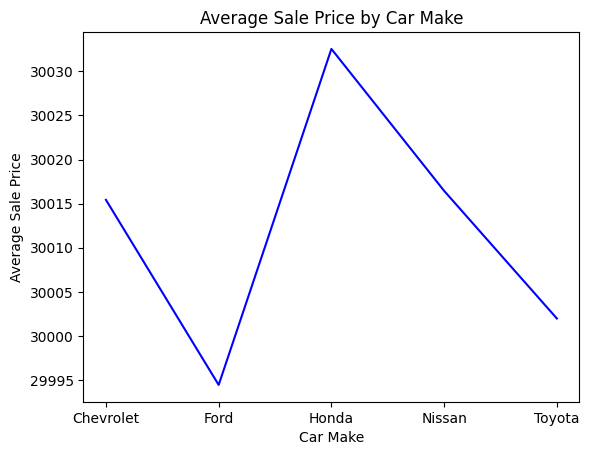

In [11]:
plt.plot(avg_sale_price, 'b-', label='Average Sale Price')
plt.xlabel('Car Make')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Car Make')
plt.show()

In [12]:
print(f'The higher price of car make is {higher_price_make}')

The higher price of car make is Honda


### Calculate the commission earned for each customer name

In [13]:
commission_earned = df.groupby('Customer Name')['Commission Earned'].sum()

### Define the best five commission earned as the top five customer names with the highest commission earned

In [14]:
best_five_commission_earned = commission_earned.nlargest(5)

### Visualize the results 

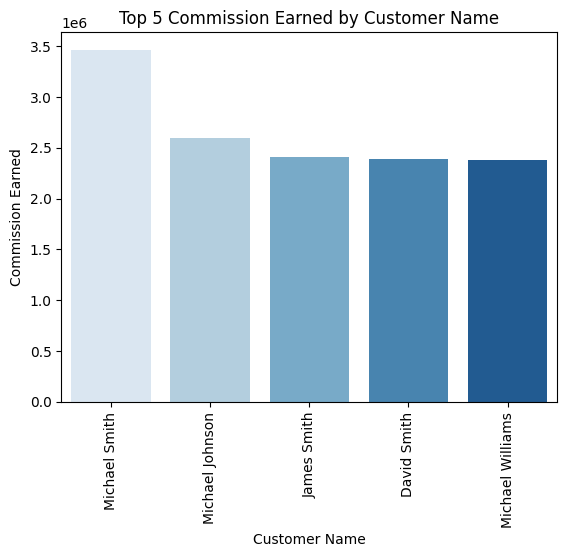

In [16]:
import seaborn as sns
sns.barplot(x=best_five_commission_earned.index, y=best_five_commission_earned.values, palette='Blues')
plt.xlabel('Customer Name')
plt.ylabel('Commission Earned')
plt.title('Top 5 Commission Earned by Customer Name')
plt.xticks(rotation=90)
plt.show()

In [17]:
print(f'The best five commission earned are {best_five_commission_earned}')

The best five commission earned are Customer Name
Michael Smith       3463226.21
Michael Johnson     2598959.83
James Smith         2405014.38
David Smith         2388019.37
Michael Williams    2380376.66
Name: Commission Earned, dtype: float64


## what is the best five month for sale ?

### Convert the Date column to a Pandas DatetimeIndex object

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

### Extract the month from the Date column and convert it to a string

In [20]:
df['Month'] = df['Date'].dt.month.astype(str)
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Month
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73,8
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40,3
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63,4
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20,9
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85,6


### Group the DataFrame by month and calculate the average sale price

In [21]:
df = df.groupby('Month').agg({'Sale Price': 'mean'})

In [22]:
df = df.sort_values('Sale Price', ascending=False)

best_months = df.head(5)
print(best_months)

         Sale Price
Month              
8      30052.312136
4      30046.320463
12     30044.549012
7      30026.342485
2      30022.099481


### Now We Want To Make a prediction for this data so we have over more 1048000 rows that lead us to build a regression of deep learning model using Relu Function and Mini_Batch to divide dataset 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

dataset = pd.read_csv('/kaggle/input/car-sales-data/car_sales_data.csv')


### Load and preprocess the data

In [3]:
dataset = pd.read_csv('/kaggle/input/car-sales-data/car_sales_data.csv') # Replace 'your_dataset.csv' with your actual dataset file
selected_columns = ['Sale Price', 'Commission Earned']  # Specify the columns you want to use
dataset = dataset[selected_columns].dropna()

### Split the dataset into train and test sets

In [4]:
train_dataset = dataset.sample(frac=0.8, random_state=42)
test_dataset = dataset.drop(train_dataset.index)

### Define the features and labels

In [5]:
features = train_dataset.drop('Commission Earned', axis=1)
labels = train_dataset['Commission Earned']

In [6]:
features = features.astype(float)

### Build the neural network model

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])

### Compile the model

In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Train the model

In [9]:
model.fit(features, labels, epochs=10)

Epoch 1/10
62500/62500 [==============================] - 85s 1ms/step - loss: 872008.4375 - mae: 753.5306
Epoch 2/10
62500/62500 [==============================] - 84s 1ms/step - loss: 866344.7500 - mae: 751.8130
Epoch 3/10
62500/62500 [==============================] - 83s 1ms/step - loss: 865699.7500 - mae: 751.6388
Epoch 4/10
62500/62500 [==============================] - 84s 1ms/step - loss: 865595.1875 - mae: 751.6232
Epoch 5/10
62500/62500 [==============================] - 83s 1ms/step - loss: 865109.8125 - mae: 751.4537
Epoch 6/10
62500/62500 [==============================] - 84s 1ms/step - loss: 864915.7500 - mae: 751.3984
Epoch 7/10
62500/62500 [==============================] - 84s 1ms/step - loss: 864808.2500 - mae: 751.3726
Epoch 8/10
62500/62500 [==============================] - 84s 1ms/step - loss: 864487.4375 - mae: 751.2692
Epoch 9/10
62500/62500 [==============================] - 83s 1ms/step - loss: 864521.8125 - mae: 751.2651
Epoch 10/10
62500/62500 [============

### Evaluate the model

In [10]:
model.evaluate(features, labels)

62500/62500 [==============================] - 65s 1ms/step - loss: 864688.8750 - mae: 751.3420


[864688.875, 751.3419799804688]

### Convert the test data to a NumPy array

In [11]:
test_dataset = test_dataset.to_numpy()

### Reshape the test data

In [12]:
test_dataset = test_dataset.reshape(-1, 1)

### Make predictions

In [13]:
predictions = model.predict(test_dataset)

31250/31250 [==============================] - 29s 933us/step


In [14]:
print(predictions)

[[2058.435  ]
 [ 235.10333]
 [2777.425  ]
 ...
 [ 116.85529]
 [2109.8132 ]
 [ 290.71768]]


### Ploting The Result

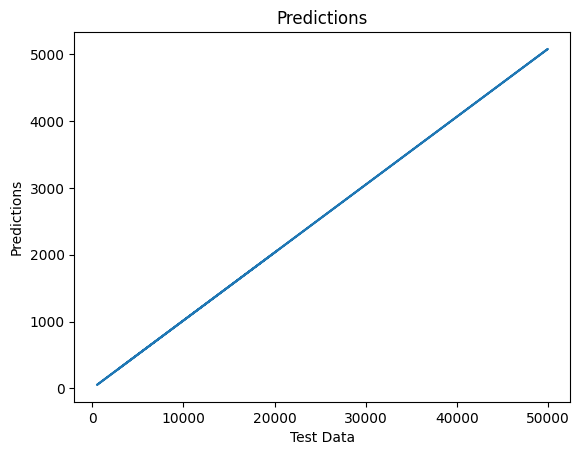

In [15]:
import matplotlib.pyplot as plt

plt.plot(test_dataset, predictions)
plt.xlabel('Test Data')
plt.ylabel('Predictions')
plt.title('Predictions')
plt.show()